In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import requests
import json
import tweepy
from timeit import default_timer as timer

# Gather

1. Twitter archive data, CSV file (given)
2. Twitter image classification data predicted using neural network, TSV file downloaded programmatically
3. Twitter data via the Twitter API in JSON format

#### 1. Twitter archive data 

In [2]:
# Reach csv file
archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### 2. Predicted image data

In [4]:
# Request the file from the url
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)

# Programmatically write the contents to a tsv file
with open('image-predictions.tsv', mode='wb') as file:
    file.write(r.content)

# Read tsv file
image_prediction = pd.read_csv('image-predictions.tsv', sep='\t' )

In [5]:
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### 3. Twitter API data

In [6]:
# Authenticate Twitter app
from twitter_creds import *

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, 
                 parser = tweepy.parsers.JSONParser(), 
                 wait_on_rate_limit = True, 
                 wait_on_rate_limit_notify = True)

In [7]:
# Isolate the tweet IDs from the archive DataFrame
tweet_ids = archive.tweet_id.values
len(tweet_ids)

2356

In [8]:
# Fetch tweets from the Twitter API
tweets = []
fail_ids = []
counter = 0

start = timer()
for tweet_id in tweet_ids:
    counter += 1
    print(str(counter) + ': ' + str(tweet_id))
    
    try:
        tweet = api.get_status(tweet_id, tweet_mode="extended")
        tweets.append(tweet)
        print('Success')
        
    except Exception as e:
        fail_ids.append(tweet_id)
          
end = timer()
print(end - start)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 886054160059072513
Su

In [9]:
print("Number of tweets found successfully: " + str(len(tweets)))
print("Number of tweets failed to find: " + str(len(fail_ids)))

Number of tweets found successfully: 2333
Number of tweets failed to find: 23


In [10]:
# Dump contents of the successful tweet list to a txt file
with open('tweet_json.txt', 'w') as outfile:
    json.dump(tweets, outfile, sort_keys=True, indent=4, ensure_ascii=False)

In [8]:
# Read the txt file into a DataFrame and select the desired columns
tweets = pd.read_json('tweet_json.txt')
tweets = tweets.loc[:, ['id', 'retweet_count', 'favorite_count']]
tweets

,id,retweet_count,favorite_count
0,892420643555336193,7863,36913
1,892177421306343426,5835,31764
2,891815181378084864,3853,23932
3,891689557279858688,8036,40228
4,891327558926688256,8687,38424
5,891087950875897856,2894,19334
6,890971913173991426,1906,11262
7,890729181411237888,17567,62240
8,890609185150312448,3990,26598
9,890240255349198849,6835,30445


# Assess

In [9]:
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [10]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [12]:
archive.name.value_counts()

None          745
a              55
Charlie        12
Oliver         11
Lucy           11
Cooper         11
Penny          10
Lola           10
Tucker         10
Winston         9
Bo              9
Sadie           8
the             8
an              7
Bailey          7
Daisy           7
Toby            7
Buddy           7
Leo             6
Bella           6
Dave            6
Milo            6
Stanley         6
Oscar           6
Jax             6
Rusty           6
Jack            6
Koda            6
Scout           6
Sunny           5
             ... 
Rodney          1
Kawhi           1
Dook            1
Dwight          1
Carbon          1
Opie            1
Kanu            1
officially      1
Trip            1
Charleson       1
Cuddles         1
life            1
Bradley         1
Cedrick         1
Tuco            1
Arlen           1
Willie          1
Timofy          1
Sky             1
Arnold          1
Hubertson       1
Carll           1
Smiley          1
Philippe        1
Comet     

In [13]:
archive.retweeted_status_user_id.value_counts()

4.196984e+09    156
4.296832e+09      2
5.870972e+07      1
6.669901e+07      1
4.119842e+07      1
7.475543e+17      1
7.832140e+05      1
7.266347e+08      1
4.871977e+08      1
5.970642e+08      1
4.466750e+07      1
1.228326e+09      1
7.992370e+07      1
2.488557e+07      1
7.874618e+17      1
3.638908e+08      1
5.128045e+08      1
8.117408e+08      1
1.732729e+09      1
1.960740e+07      1
1.547674e+08      1
3.410211e+08      1
7.124572e+17      1
2.804798e+08      1
1.950368e+08      1
Name: retweeted_status_user_id, dtype: int64

In [14]:
archive.retweeted_status_user_id.count()

181

In [15]:
archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [16]:
archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [17]:
archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [18]:
archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [19]:
archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [20]:
archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [21]:
archive.tweet_id.duplicated().sum()

0

In [22]:
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [23]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [24]:
image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [25]:
image_prediction.tweet_id.duplicated().sum()

0

In [26]:
image_prediction.jpg_url.duplicated().sum()

66

In [27]:
tweets.head()

,id,retweet_count,favorite_count
0,892420643555336193,7863,36913
1,892177421306343426,5835,31764
2,891815181378084864,3853,23932
3,891689557279858688,8036,40228
4,891327558926688256,8687,38424


In [28]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 3 columns):
id                2333 non-null int64
retweet_count     2333 non-null int64
favorite_count    2333 non-null int64
dtypes: int64(3)
memory usage: 54.8 KB


In [29]:
tweets.describe()

,id,retweet_count,favorite_count
count,2.333000e+03,2333.000000,2333.000000
mean,7.419279e+17,2770.440634,7699.519074
std,6.820607e+16,4689.392306,11951.168127
min,6.660209e+17,1.000000,0.000000
25%,6.782786e+17,557.000000,1336.000000
50%,7.184547e+17,1299.000000,3351.000000
75%,7.986654e+17,3222.000000,9454.000000
max,8.924206e+17,79586.000000,159499.000000


In [30]:
tweets.id.duplicated().sum()

0

#### Quality

**archive**
1. Remove retweets
    2. Drop retweet columns
2. Convert `timestamp` to datetime object
3. "None" in `doggo`, `floofer`, `pupper`, and `puppo` columns are strings, not null values
4. Correct denominators not equal to 10
5. 745 dogs with "None" as names, not null values
6. Incorrect dog names from text parsing (i.e. "a" and "an")
7. Drop other unneeded columns

**image_prediction**
8. Drop `img_num` column
9. Remove 66 duplicated image URLs

#### Tidiness
1. `doggo`, `floofer`, `pupper`, and `puppo` columns should be consolidated into one column
2. Combine three DataFrames into one

# Clean

In [31]:
archive_clean = archive.copy()
images_clean = image_prediction.copy()
tweets_clean = tweets.copy()

## Quality
#### Define
**1. Remove retweets, then drop reteweet columns**  
There are 181 retweets in the `archive` DataFrame. For this analysis, we will only be using original tweets, so these must be removed. After testing that they have been removed, drop the erroneous columns.

#### Code

In [32]:
archive_clean = archive_clean[archive_clean['retweeted_status_user_id'].isnull()]

#### Test

In [33]:
archive_clean.shape[0]

2175

In [34]:
archive_clean.retweeted_status_user_id.value_counts()

Series([], Name: retweeted_status_user_id, dtype: int64)

There are now only null values in the `retweeted_status_user_id` column and the DataFrame size reflects the omission of retweets. Now the erroneous columns can be dropped from the dataset.

#### Code

In [35]:
archive_clean = archive_clean.drop(columns=['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

#### Test

In [36]:
archive_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


#### Define
**2. Convert `timestamp` to datetime object**  
In order to perform time series analysis, this datetime dimension must be in datetime format rather than a string.

#### Code

In [37]:
archive_clean['timestamp'] = pd.to_datetime(archive_clean.timestamp)

#### Test

In [38]:
archive_clean.dtypes

tweet_id                          int64
in_reply_to_status_id           float64
in_reply_to_user_id             float64
timestamp                datetime64[ns]
source                           object
text                             object
expanded_urls                    object
rating_numerator                  int64
rating_denominator                int64
name                             object
doggo                            object
floofer                          object
pupper                           object
puppo                            object
dtype: object

#### Define
**3. "None" in `doggo`, `floofer`, `pupper`, and `puppo` columns are strings, not null values**  
These values need to be accurrately represented as nulls so as to not throw off any potential counting or other arithmetic we may potentially use to analyze these categories.

#### Code

In [39]:
columns = ['doggo', 'floofer', 'pupper', 'puppo']
archive_clean[columns] = archive_clean[columns].replace('None', np.nan)

#### Test

In [40]:
archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN


In [41]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    87 non-null object
floofer                  10 non-null object
pupper                   234 non-null object
puppo                    25 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(8)
memory usage: 254.9+ KB


Based on the counts of each of the dog classification columns seen in the assessment, the "None" strings have been correctly replaced with NaN values.

#### Define
**4. Correct denominators not equal to 10**  
While the unique rating system varies for the numerator, the denominator should be 10 for all ratings. Replace all values in the column with 10.

#### Code

In [42]:
archive_clean['rating_denominator'] = 10

#### Test

In [43]:
archive_clean.rating_denominator.value_counts()

10    2175
Name: rating_denominator, dtype: int64

#### Define
**5. 745 dogs with "None" as names, not null values**  
Just as in the dog stage categorical columns, "None" should be replaced with NaN values to avoid counting and other arithmetic errors in analysis.

#### Code

In [44]:
archive_clean['name'] = archive_clean['name'].replace('None', np.nan)

#### Test

In [45]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     1495 non-null object
doggo                    87 non-null object
floofer                  10 non-null object
pupper                   234 non-null object
puppo                    25 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(8)
memory usage: 254.9+ KB


#### Define
**6. Incorrect dog names from text parsing (i.e. "a" and "an")**  
For now, remove these names and treat them as NaN values.

#### Code

Further assessment shows that most of the incorrect names are lowercase, so lowercase strings will be evaluated first.

In [46]:
archive_clean.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', nan, 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'such', 'Canela', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Earl',
       'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty',
       'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a', 'Elliot',
       'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven',
       'Beau', 'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante',
       'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash',
       'Jed', 'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie',
       'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha',
       'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey

In [47]:
lowercase_names = archive_clean[archive_clean.name.str.islower() & archive_clean.name.notnull()]
lowercase_names

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,https://twitter.com/dog_rates/status/887517139...,14,10,such,NaN,NaN,NaN,NaN
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,https://twitter.com/dog_rates/status/881536004...,14,10,a,NaN,NaN,pupper,NaN
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,https://twitter.com/dog_rates/status/859196978...,12,10,quite,NaN,NaN,NaN,NaN
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22,"<a href=""http://twitter.com/download/iphone"" r...","Guys, we only rate dogs. This is quite clearly...",https://twitter.com/dog_rates/status/855459453...,12,10,quite,NaN,NaN,NaN,NaN
335,832645525019123713,NaN,NaN,2017-02-17 17:38:57,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",There's going to be a dog terminal at JFK Airp...,http://us.blastingnews.com/news/2017/02/jfk-an...,10,10,not,NaN,NaN,NaN,NaN
369,828650029636317184,NaN,NaN,2017-02-06 17:02:17,"<a href=""http://twitter.com/download/iphone"" r...","Occasionally, we're sent fantastic stories. Th...",https://twitter.com/dog_rates/status/828650029...,14,10,one,NaN,NaN,NaN,NaN
542,806219024703037440,NaN,NaN,2016-12-06 19:29:28,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please stop sending in non-...,https://twitter.com/dog_rates/status/806219024...,11,10,incredibly,NaN,NaN,NaN,NaN
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,https://twitter.com/dog_rates/status/792913359...,13,10,a,NaN,NaN,NaN,NaN
801,772581559778025472,NaN,NaN,2016-09-04 23:46:12,"<a href=""http://twitter.com/download/iphone"" r...",Guys this is getting so out of hand. We only r...,https://twitter.com/dog_rates/status/772581559...,10,10,a,NaN,NaN,NaN,NaN
819,770655142660169732,NaN,NaN,2016-08-30 16:11:18,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Pls stop sending in non-can...,https://twitter.com/dog_rates/status/770655142...,11,10,very,NaN,NaN,NaN,NaN


It appears the visual assessment of lowercase names was correct. Replace these values in the cleaned DataFrame with NaN.

In [48]:
lowercase_names.name.value_counts()

a               55
the              8
an               6
one              4
very             4
quite            3
just             3
actually         2
getting          2
not              2
incredibly       1
such             1
unacceptable     1
all              1
light            1
old              1
my               1
his              1
life             1
officially       1
by               1
this             1
mad              1
infuriating      1
space            1
Name: name, dtype: int64

In [49]:
archive_clean.loc[(archive_clean.name.str.islower() & archive_clean.name.notnull()), 'name'] = np.nan

#### Test

In [50]:
archive_clean.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
173,858471635011153920,NaN,NaN,2017-04-30 00:02:42,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She just arrived. Used paworit...,https://twitter.com/dog_rates/status/858471635...,13,10,Sophie,NaN,NaN,NaN,NaN
21,887705289381826560,NaN,NaN,2017-07-19 16:06:48,"<a href=""http://twitter.com/download/iphone"" r...",This is Jeffrey. He has a monopoly on the pool...,https://twitter.com/dog_rates/status/887705289...,13,10,Jeffrey,NaN,NaN,NaN,NaN
1998,672538107540070400,NaN,NaN,2015-12-03 22:09:14,"<a href=""http://twitter.com/download/iphone"" r...",Meet Darby. He's a Fiscal Tutankhamen Waxbeard...,https://twitter.com/dog_rates/status/672538107...,7,10,Darby,NaN,NaN,NaN,NaN
1516,690959652130045952,NaN,NaN,2016-01-23 18:09:53,"<a href=""http://twitter.com/download/iphone"" r...",This golden is happy to refute the soft mouth ...,https://twitter.com/dog_rates/status/690959652...,11,10,NaN,NaN,NaN,NaN,NaN
743,780459368902959104,NaN,NaN,2016-09-26 17:29:48,"<a href=""http://twitter.com/download/iphone"" r...","This is Bear. Don't worry, he's not a real bea...",https://twitter.com/dog_rates/status/780459368...,11,10,Bear,NaN,NaN,NaN,NaN
1414,698710712454139905,NaN,NaN,2016-02-14 03:29:49,"<a href=""http://twitter.com/download/iphone"" r...",This is Cuddles. He's not entirely sure how do...,https://twitter.com/dog_rates/status/698710712...,10,10,Cuddles,NaN,NaN,NaN,NaN
1817,676603393314578432,NaN,NaN,2015-12-15 03:23:14,"<a href=""http://twitter.com/download/iphone"" r...",This is Godzilla pupper. He had a ruff childho...,https://twitter.com/dog_rates/status/676603393...,9,10,Godzilla,NaN,NaN,pupper,NaN
1110,733822306246479872,NaN,NaN,2016-05-21 00:50:46,"<a href=""http://twitter.com/download/iphone"" r...",This is Moose. He's a Polynesian Floofer. Dapp...,https://twitter.com/dog_rates/status/733822306...,10,10,Moose,NaN,floofer,NaN,NaN
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,https://twitter.com/dog_rates/status/855851453...,13,10,NaN,doggo,NaN,NaN,puppo
2123,670385711116361728,NaN,NaN,2015-11-27 23:36:23,"<a href=""http://twitter.com/download/iphone"" r...",Meet Larry. He's a Panoramic Benzoate. Can sho...,https://twitter.com/dog_rates/status/670385711...,8,10,Larry,NaN,NaN,NaN,NaN


In [51]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     1391 non-null object
doggo                    87 non-null object
floofer                  10 non-null object
pupper                   234 non-null object
puppo                    25 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(8)
memory usage: 254.9+ KB


In [52]:
archive_clean.name.value_counts()

Lucy         11
Charlie      11
Oliver       10
Cooper       10
Penny         9
Tucker        9
Lola          8
Winston       8
Sadie         8
Daisy         7
Toby          7
Bailey        6
Oscar         6
Stanley       6
Bella         6
Bo            6
Jax           6
Koda          6
Buddy         5
Milo          5
Rusty         5
Dave          5
Scout         5
Louis         5
Leo           5
Chester       5
Bentley       5
Jeffrey       4
Finn          4
Phil          4
             ..
Pancake       1
Cedrick       1
Tuco          1
Arlen         1
Kara          1
Rilo          1
Mattie        1
Shnuggles     1
Tanner        1
Champ         1
Dylan         1
Blakely       1
Sonny         1
Stubert       1
Dixie         1
Billl         1
Edmund        1
Mason         1
Odin          1
Ralpher       1
Ronduh        1
Ridley        1
Godi          1
Tess          1
Shooter       1
Shikha        1
Mark          1
Sully         1
Benny         1
Kellogg       1
Name: name, Length: 930,

#### Define
**7. Drop other unneeded columns**  
The `in_reply_to_status_id`, `in_reply_to_user_id`, and `source` columns are not needed for this analysis and can be removed.

#### Code

In [53]:
archive_clean = archive_clean.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id', 'source'])

#### Test

In [54]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  1391 non-null object
doggo                 87 non-null object
floofer               10 non-null object
pupper                234 non-null object
puppo                 25 non-null object
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 203.9+ KB


#### Define
**8. Drop `img_num` column**  
This column is not needed for analysis and can be removed.

#### Code

In [55]:
images_clean = images_clean.drop(columns='img_num', axis=1)

#### Test

In [56]:
images_clean.head(1)

,tweet_id,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


#### Define
**9. Remove 66 duplicated image URLs**  
To avoid double counting tweets, duplicate images must be dropped from the DataFrame.

#### Code

In [57]:
images_clean = images_clean.drop_duplicates(subset='jpg_url', keep=False)

#### Test

In [58]:
images_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1943 entries, 0 to 2074
Data columns (total 11 columns):
tweet_id    1943 non-null int64
jpg_url     1943 non-null object
p1          1943 non-null object
p1_conf     1943 non-null float64
p1_dog      1943 non-null bool
p2          1943 non-null object
p2_conf     1943 non-null float64
p2_dog      1943 non-null bool
p3          1943 non-null object
p3_conf     1943 non-null float64
p3_dog      1943 non-null bool
dtypes: bool(3), float64(3), int64(1), object(4)
memory usage: 142.3+ KB


## Tidiness
#### Define
**1. `doggo`, `floofer`, `pupper`, and `puppo` columns should be consolidated into one column**  
This will limit the number of columns/null values in the analysis. This will be done using the `.melt()` method.  
In order to do this, separate the rows by those that belong to each group individually (including those with no classification). Then merge the DataFrames.

#### Code

In [59]:
def melt_cols(col_names):
    """
    1. Loop through input columns to find rows with classifications and create separate melted DataFrames. 
    2. Drop rows where NaN in value column, then drop column.
    2. Isolate rows where there are no classifications and specify NaN for classification.
    3. Concatenate all into one DataFrame.
    """
    frames = []
    for column in col_names:
        new_df = archive_clean[archive_clean[column].notnull()]
        new_df_clean = pd.melt(new_df, id_vars=['tweet_id', 'timestamp', 'text', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name'], 
                        var_name='dog_stage', value_name='stage')
        new_df_clean = new_df_clean[new_df_clean['stage'].notnull()]
        new_df_clean = new_df_clean.drop(columns='stage')
        frames.append(new_df_clean)
            
    mask = archive_clean['doggo'].isnull() & archive_clean['floofer'].isnull() & archive_clean['pupper'].isnull() & archive_clean['puppo'].isnull()
    null_class = archive_clean[mask]
    null_class['dog_stage'] = np.nan
    null_class = null_class.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'])
    frames.append(null_class)

    result = pd.concat(frames)
    return result

In [60]:
archive_clean = melt_cols(['doggo', 'floofer', 'pupper', 'puppo'])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


#### Test

In [61]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2211 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id              2211 non-null int64
timestamp             2211 non-null datetime64[ns]
text                  2211 non-null object
expanded_urls         2153 non-null object
rating_numerator      2211 non-null int64
rating_denominator    2211 non-null int64
name                  1403 non-null object
dog_stage             380 non-null object
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 155.5+ KB


In [62]:
archive_clean.dog_stage.value_counts()

pupper     244
doggo       99
puppo       26
floofer     11
Name: dog_stage, dtype: int64

#### Define
**2. Combine three DataFrames into one**  
In order to analyze the tweet performance against the dog classifications and image predictions, the DataFrames must be combined. This will be done using `.merge()`.

#### Code

In [63]:
df = pd.merge(archive_clean, images_clean, on='tweet_id', how='inner')

In [64]:
# Rename id column in the tweets_clean DataFrame to merge
tweets_clean = tweets_clean.rename(columns={'id': 'tweet_id'})

In [65]:
df = pd.merge(df, tweets_clean, on='tweet_id', how='inner')

#### Test

In [66]:
df

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,890240255349198849,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,6835,30445
1,884162670584377345,2017-07-09 21:29:42,Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,doggo,https://pbs.twimg.com/media/DEUtQbzW0AUTv_o.jpg,German_shepherd,0.707046,True,malinois,0.199396,True,Norwegian_elkhound,0.049148,True,2778,19463
2,872967104147763200,2017-06-09 00:02:31,Here's a very large dog. He has a date later. ...,https://twitter.com/dog_rates/status/872967104...,12,10,NaN,doggo,https://pbs.twimg.com/media/DB1m871XUAAw5vZ.jpg,Labrador_retriever,0.476913,True,Chesapeake_Bay_retriever,0.174145,True,German_short-haired_pointer,0.092861,True,5093,26184
3,871515927908634625,2017-06-04 23:56:03,This is Napolean. He's a Raggedy East Nicaragu...,https://twitter.com/dog_rates/status/871515927...,12,10,Napolean,doggo,https://pbs.twimg.com/media/DBg_HT9WAAEeIMM.jpg,komondor,0.974781,True,briard,0.020041,True,swab,0.003228,False,3268,19391
4,869596645499047938,2017-05-30 16:49:31,This is Scout. He just graduated. Officially a...,https://twitter.com/dog_rates/status/869596645...,12,10,Scout,doggo,https://pbs.twimg.com/media/DBFtiYqWAAAsjj1.jpg,Chihuahua,0.955156,True,toy_terrier,0.008054,True,muzzle,0.006296,False,2980,15414
5,858843525470990336,2017-05-01 00:40:27,I have stumbled puppon a doggo painting party....,https://twitter.com/dog_rates/status/858843525...,13,10,NaN,doggo,https://pbs.twimg.com/media/C-s5oYZXkAAMHHq.jpg,golden_retriever,0.578120,True,Labrador_retriever,0.286059,True,bloodhound,0.026917,True,3403,15276
6,855851453814013952,2017-04-22 18:31:02,Here's a puppo participating in the #ScienceMa...,https://twitter.com/dog_rates/status/855851453...,13,10,NaN,doggo,https://pbs.twimg.com/media/C-CYWrvWAAU8AXH.jpg,flat-coated_retriever,0.321676,True,Labrador_retriever,0.115138,True,groenendael,0.096100,True,17603,45057
7,855851453814013952,2017-04-22 18:31:02,Here's a puppo participating in the #ScienceMa...,https://twitter.com/dog_rates/status/855851453...,13,10,NaN,puppo,https://pbs.twimg.com/media/C-CYWrvWAAU8AXH.jpg,flat-coated_retriever,0.321676,True,Labrador_retriever,0.115138,True,groenendael,0.096100,True,17603,45057
8,855851453814013952,2017-04-22 18:31:02,Here's a puppo participating in the #ScienceMa...,https://twitter.com/dog_rates/status/855851453...,13,10,NaN,doggo,https://pbs.twimg.com/media/C-CYWrvWAAU8AXH.jpg,flat-coated_retriever,0.321676,True,Labrador_retriever,0.115138,True,groenendael,0.096100,True,17603,45057
9,855851453814013952,2017-04-22 18:31:02,Here's a puppo participating in the #ScienceMa...,https://twitter.com/dog_rates/status/855851453...,13,10,NaN,puppo,https://pbs.twimg.com/media/C-CYWrvWAAU8AXH.jpg,flat-coated_retriever,0.321676,True,Labrador_retriever,0.115138,True,groenendael,0.096100,True,17603,45057


In [67]:
# Export the DataFrame to a csv file
df.to_csv('twitter_archive_master.csv', index=False)

# Analysis & Visualization

In [94]:
df.head(5)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,890240255349198849,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,6835,30445
1,884162670584377345,2017-07-09 21:29:42,Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,doggo,https://pbs.twimg.com/media/DEUtQbzW0AUTv_o.jpg,German_shepherd,0.707046,True,malinois,0.199396,True,Norwegian_elkhound,0.049148,True,2778,19463
2,872967104147763200,2017-06-09 00:02:31,Here's a very large dog. He has a date later. ...,https://twitter.com/dog_rates/status/872967104...,12,10,NaN,doggo,https://pbs.twimg.com/media/DB1m871XUAAw5vZ.jpg,Labrador_retriever,0.476913,True,Chesapeake_Bay_retriever,0.174145,True,German_short-haired_pointer,0.092861,True,5093,26184
3,871515927908634625,2017-06-04 23:56:03,This is Napolean. He's a Raggedy East Nicaragu...,https://twitter.com/dog_rates/status/871515927...,12,10,Napolean,doggo,https://pbs.twimg.com/media/DBg_HT9WAAEeIMM.jpg,komondor,0.974781,True,briard,0.020041,True,swab,0.003228,False,3268,19391
4,869596645499047938,2017-05-30 16:49:31,This is Scout. He just graduated. Officially a...,https://twitter.com/dog_rates/status/869596645...,12,10,Scout,doggo,https://pbs.twimg.com/media/DBFtiYqWAAAsjj1.jpg,Chihuahua,0.955156,True,toy_terrier,0.008054,True,muzzle,0.006296,False,2980,15414


In [122]:
plt.style.use("ggplot")
sns.set_palette("Set2")

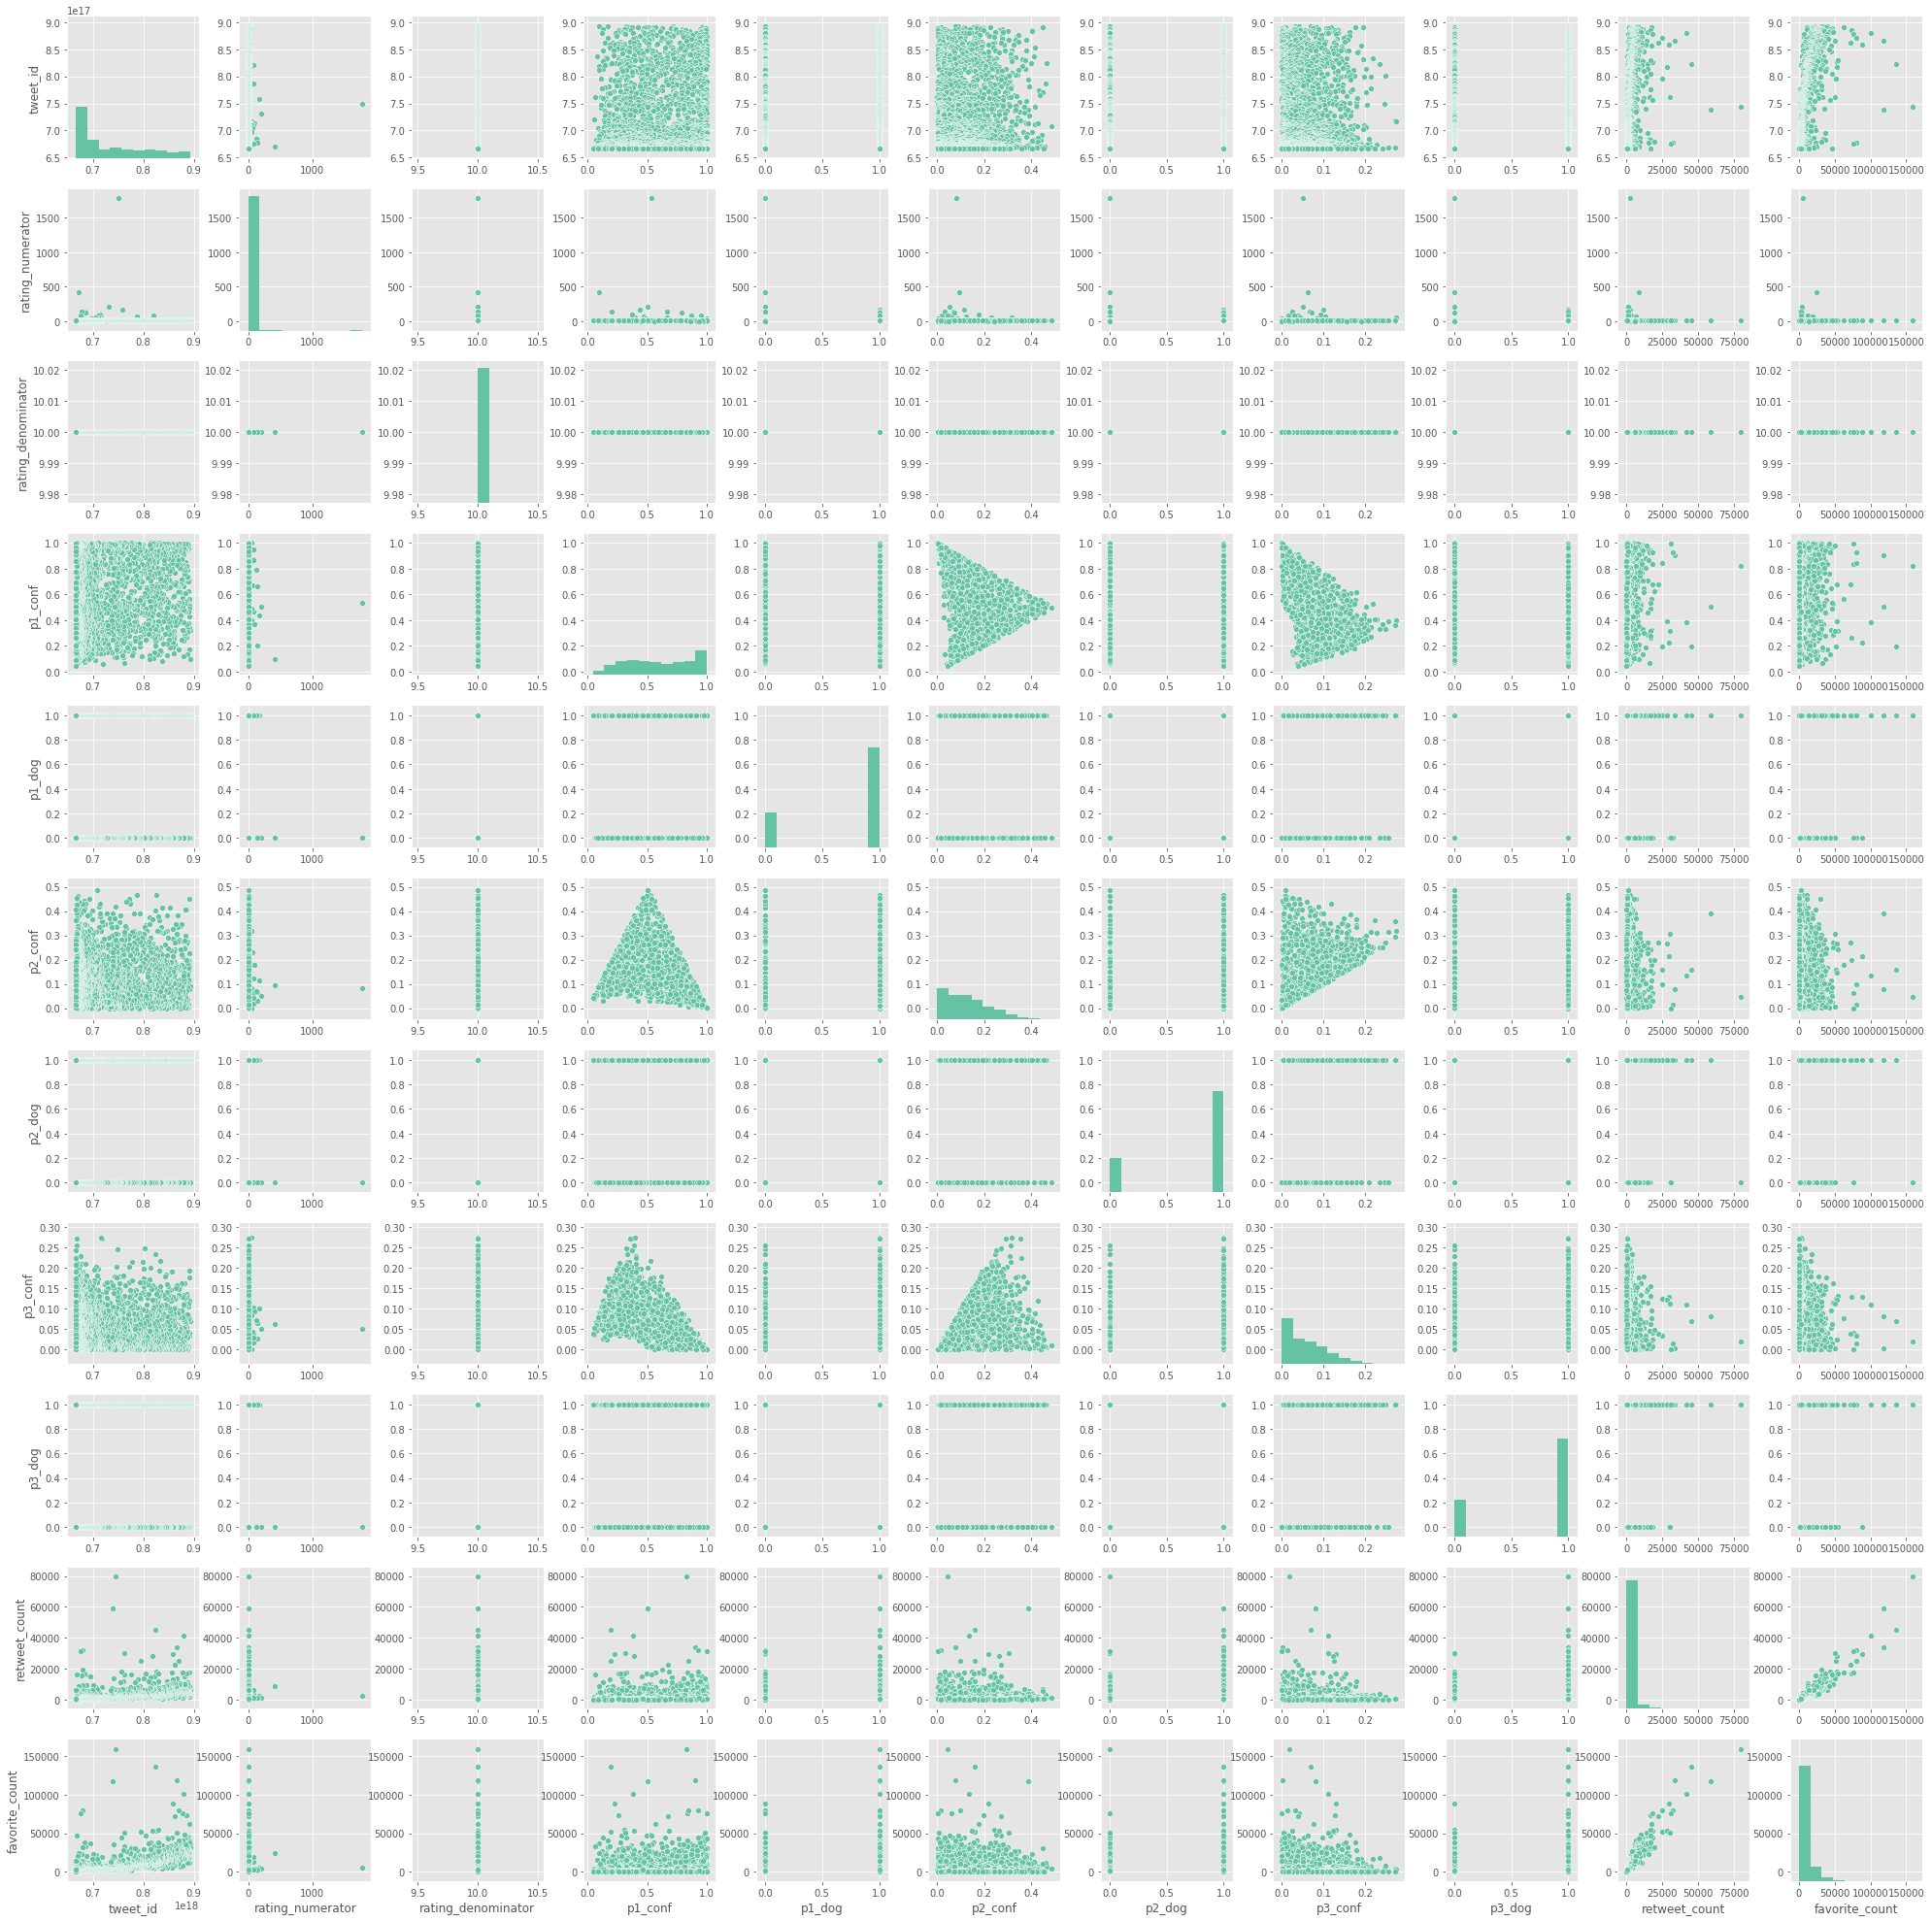

In [118]:
sns.pairplot(df);

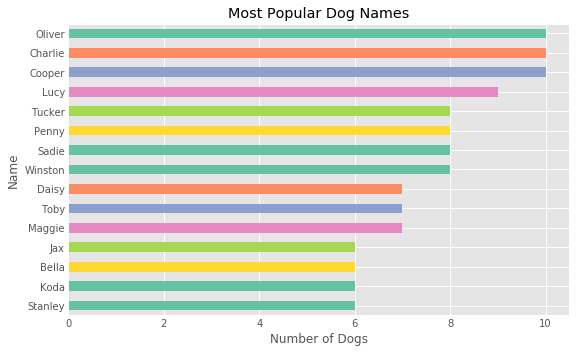

In [137]:
# Most popular dog names
names = df.name.value_counts().head(15)

plt.figure(figsize=(8,5))
names.plot(kind='barh').invert_yaxis()
plt.title('Most Popular Dog Names')
plt.ylabel('Name')
plt.xlabel('Number of Dogs')
plt.savefig('popular_dog_names.png', bbox_inches='tight');

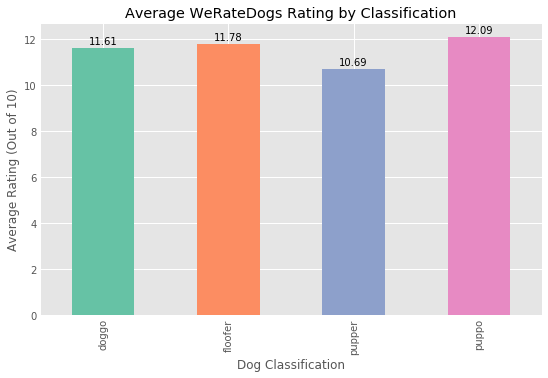

In [139]:
stage = df.groupby('dog_stage')['rating_numerator'].mean()

plt.figure(figsize=(8,5))
ax = stage.plot(kind='bar')
ax.set_title('Average WeRateDogs Rating by Classification')
ax.set_ylabel('Average Rating (Out of 10)')
ax.set_xlabel('Dog Classification')

rects = ax.patches
labels = np.round(stage.values, 2)

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 0.1, label,
           ha='center', va='bottom')
    
plt.savefig('dog_stage_rating.png', bbox_inches='tight');

In [125]:
df.rating_numerator.value_counts().sort_values()

24        1
165       1
144       1
143       1
121       1
99        1
88        1
84        1
80        1
75        1
60        1
50        1
45        1
44        1
27        1
1776      1
26        1
420       1
204       1
0         2
1         5
2         9
4        16
3        19
14       32
6        32
5        36
7        52
8        95
9       151
13      244
11      386
10      413
12      438
Name: rating_numerator, dtype: int64

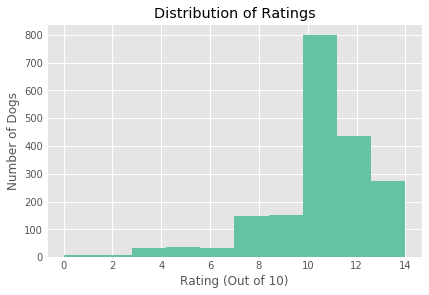

In [140]:
# Most of the ratings are < 15, so I will filter out the high values to create a plot that's easier to see
df[df['rating_numerator'] < 15]['rating_numerator'].hist()
plt.title('Distribution of Ratings')
plt.xlabel('Rating (Out of 10)')
plt.ylabel('Number of Dogs')
plt.savefig('distro_ratings', bbox_inches='tight');

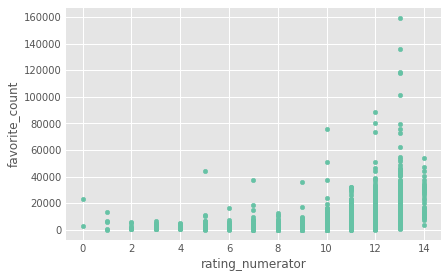

In [148]:
# Most of the ratings are < 15, so I will filter out the high values to create a plot that's easier to see
df[df['rating_numerator'] < 15].plot(kind='scatter', x='rating_numerator', y='favorite_count');

In [146]:
# Highest rated dog
df[df['rating_numerator'] == df.rating_numerator.max()]['jpg_url']

882    https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg
Name: jpg_url, dtype: object

In [147]:
# Lowest rated dog :(
df[df['rating_numerator'] == df.rating_numerator.min()]['jpg_url']

520    https://pbs.twimg.com/media/C5cOtWVWMAEjO5p.jpg
907    https://pbs.twimg.com/media/Cl2LdofXEAATl7x.jpg
Name: jpg_url, dtype: object

In [149]:
df.head(1)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,890240255349198849,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,6835,30445


## Additional cleaning to image predictions below. May want to add to cleaning section later.

In [159]:
# Which dogs were the "easiest" to predict based on image
p1 = df.loc[:, ['p1', 'p1_conf', 'p1_dog']]
p2 = df.loc[:, ['p2', 'p2_conf', 'p2_dog']]
p3 = df.loc[:, ['p3', 'p3_conf', 'p3_dog']]

In [160]:
# Clean dog names so that they can be matched
p1['p1'] = p1.p1.str.lower()
p2['p2'] = p2.p2.str.lower()
p1['p3'] = p3.p3.str.lower()

In [162]:
p2.head()

,p2,p2_conf,p2_dog
0,cardigan,0.451038,True
1,malinois,0.199396,True
2,chesapeake_bay_retriever,0.174145,True
3,briard,0.020041,True
4,toy_terrier,0.008054,True


In [169]:
# Drop rows where the neural net did not correctly identify a dog breed
p1 = p1[p1['p1_dog'] == True]
p2 = p2[p2['p2_dog'] == True]
p3 = p3[p3['p3_dog'] == True]

# Weird extra column for p1...
p1 = p1.drop('p3', axis=1)

In [171]:
# Rename columns to have consist naming convention across DataFrames
p1 = p1.rename(columns={'p1': 'p', 'p1_conf': 'p_conf', 'p1_dog': 'p_dog'})
p2 = p2.rename(columns={'p2': 'p', 'p2_conf': 'p_conf', 'p2_dog': 'p_dog'})
p3 = p3.rename(columns={'p3': 'p', 'p3_conf': 'p_conf', 'p3_dog': 'p_dog'})

In [175]:
# Stack all of the DataFrames to analyze together using concat
predictions = pd.concat([p1, p2, p3])
predictions.head()

,p,p_conf,p_dog
0,pembroke,0.511319,True
1,german_shepherd,0.707046,True
2,labrador_retriever,0.476913,True
3,komondor,0.974781,True
4,chihuahua,0.955156,True


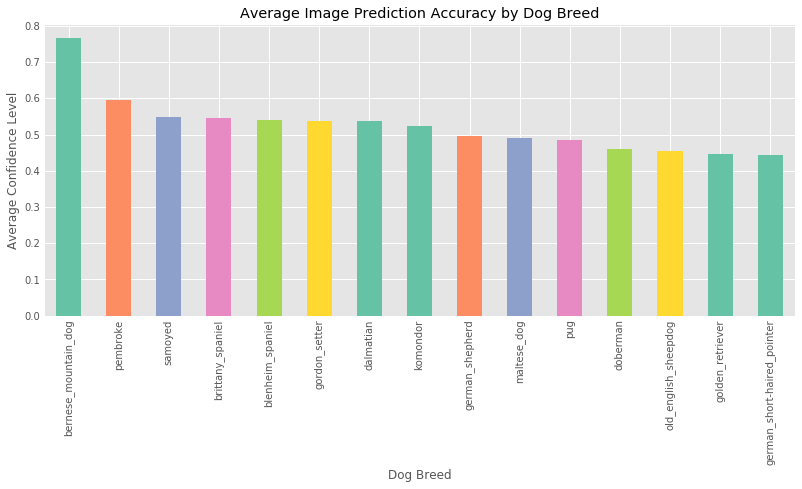

In [181]:
avg_win = predictions.groupby('p')['p_conf'].mean()
plt.figure(figsize=(12,5))
avg_win.sort_values(ascending=False).head(15).plot(kind='bar')
plt.title('Average Image Prediction Accuracy by Dog Breed')
plt.xlabel('Dog Breed')
plt.ylabel('Average Confidence Level')
plt.savefig('avg_conf.png', bbox_inches='tight');

In [202]:
# Create new column with year/month to plot more easily
df['year_month'] = pd.to_datetime(df['timestamp'], format='%m-%Y')
df.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,p1,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,year_month
0,890240255349198849,07-2017,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,Pembroke,...,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,6835,30445,2017-07-01
1,884162670584377345,07-2017,Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,doggo,https://pbs.twimg.com/media/DEUtQbzW0AUTv_o.jpg,German_shepherd,...,True,malinois,0.199396,True,Norwegian_elkhound,0.049148,True,2778,19463,2017-07-01
2,872967104147763200,06-2017,Here's a very large dog. He has a date later. ...,https://twitter.com/dog_rates/status/872967104...,12,10,NaN,doggo,https://pbs.twimg.com/media/DB1m871XUAAw5vZ.jpg,Labrador_retriever,...,True,Chesapeake_Bay_retriever,0.174145,True,German_short-haired_pointer,0.092861,True,5093,26184,2017-06-01
3,871515927908634625,06-2017,This is Napolean. He's a Raggedy East Nicaragu...,https://twitter.com/dog_rates/status/871515927...,12,10,Napolean,doggo,https://pbs.twimg.com/media/DBg_HT9WAAEeIMM.jpg,komondor,...,True,briard,0.020041,True,swab,0.003228,False,3268,19391,2017-06-01
4,869596645499047938,05-2017,This is Scout. He just graduated. Officially a...,https://twitter.com/dog_rates/status/869596645...,12,10,Scout,doggo,https://pbs.twimg.com/media/DBFtiYqWAAAsjj1.jpg,Chihuahua,...,True,toy_terrier,0.008054,True,muzzle,0.006296,False,2980,15414,2017-05-01


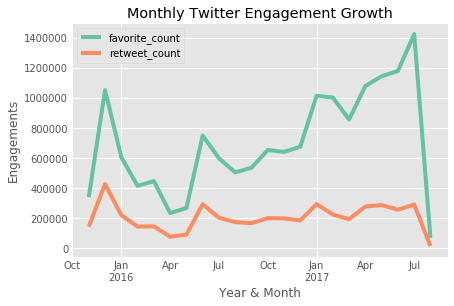

In [206]:
by_yearmonth = df.groupby('year_month')['favorite_count', 'retweet_count'].sum()
by_yearmonth = by_yearmonth.sort_index()

by_yearmonth.plot()
plt.title('Monthly Twitter Engagement Growth')
plt.xlabel('Year & Month')
plt.ylabel('Engagements')
plt.savefig('eng_growth.png', bbox_inches='tight');